In [1]:
# loading the necessary libraries

import torch
import torch.nn as nn

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np

from torch.utils.data import DataLoader


In [2]:
# function to visualize a model's weight

def visualize_model(model):
    weight = model.state_dict()['linear.weight'].data

    for i in range(weight.shape[0]):

        plt.subplot(2,5, i+1 )
        plt.imshow(weight[i].numpy().reshape(28, 28), cmap='seismic')
        plt.title("class {}".format(i))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [3]:
# function to visualize an image

def visualize_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap = "gray")
    plt.title(data_sample[1])


In [4]:
# softmax classifier class

class softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.linear = nn.Linear(in_size, out_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        
        return yhat

In [5]:
# download the MNIST dataset and create  dataloaders

train_set = dsets.MNIST("./data", train = True, download = True, transform = transforms.ToTensor())
val_set = dsets.MNIST("./data", train = False, download = True, transform = transforms.ToTensor())

train_loader = DataLoader(dataset = train_set, batch_size = 512)
val_loader = DataLoader(dataset = val_set, batch_size = 2000)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# create the model

in_size = train_set[0][0].shape[1]*train_set[0][0].shape[2]
out_size = 10

model = softmax(in_size, out_size)


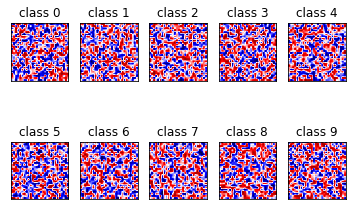

In [7]:
# visualize the initial model
visualize_model(model)

In [8]:
# hyper parameters

learning_rate = .1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [9]:
# train_model function using the training and validation sets
n_epochs = 20
loss_list = []
accuracy_list = []
N_test = len(val_set)

def train_model(epochs):
    for epoch in range(epochs):
        print("In epoch: {} ".format(epoch) )
        for x,y in train_loader:
            yhat = model(x.view(-1, 28*28))
            loss = criterion(yhat, y)
            
            # clear the gradients
            
            optimizer.zero_grad()
            
            # calculate the gradients
            loss.backward()
            
            # compute the gradient, w' = w - lr
            optimizer.step()
            
        correct = 0
        for x_val, y_val in val_loader:
            z = model(x_val.view(-1, 28*28))
            _, pred_y = torch.max(z.data, 1)
            correct+=(pred_y==y_val).sum().item()
        
        accuracy_list.append(correct/N_test)
        loss_list.append(loss.data)
        

In [10]:
train_model(n_epochs)

In epoch: 0 
In epoch: 1 
In epoch: 2 
In epoch: 3 
In epoch: 4 
In epoch: 5 
In epoch: 6 
In epoch: 7 
In epoch: 8 
In epoch: 9 
In epoch: 10 
In epoch: 11 
In epoch: 12 
In epoch: 13 
In epoch: 14 
In epoch: 15 
In epoch: 16 
In epoch: 17 
In epoch: 18 
In epoch: 19 


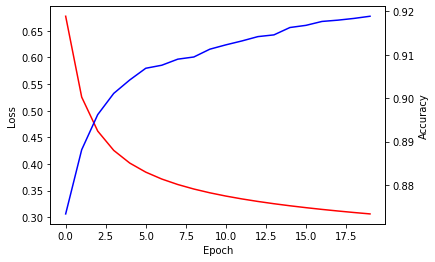

In [12]:
# plot the loss and accuracies

epochs = np.arange(0, n_epochs, 1)
fig, ax1 = plt.subplots()
ax1.plot(epochs, loss_list, color = "red")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2 = ax1.twinx()
ax2.plot(epochs, accuracy_list, color = "blue")
ax2.set_ylabel("Accuracy")

plt.show()

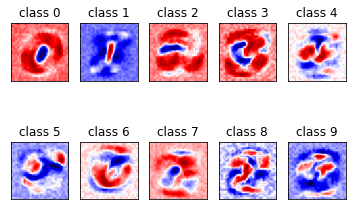

In [14]:
# visualize the trained model
visualize_model(model)